In [27]:
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML2.2%20real%20classification/data/diabetes.csv")

#data.head()
data.info()
#data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Pregnancies 0.11725234885151459
Glucose 0.03360003994432874
BloodPressure -0.014087324950570175
SkinThickness -0.0012704123374779213
Insulin -0.0012403324997230483
BMI 0.07720212280144755
DiabetesPedigreeFunction 1.4190423588786747
Age 0.01003518225681784
1 1
0 0
1 1
0 0
1 1
0 0
1 0
0 1
1 1
1 0


C:\Users\npano\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Axes: >

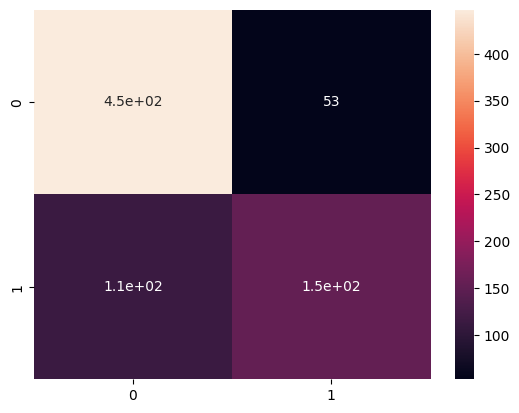

In [28]:
y = data.Outcome
X = data.drop(["Outcome"], axis=1)

logistic = LogisticRegression()
logistic.fit(X, y)

_ = [print(k, v) for k, v in zip(X.columns, logistic.coef_[0])]
#print("Intercept: \n", logistic.intercept_)

y_pred = logistic.predict(X)
_ = [print(a, b) for a, b in list(zip(y, y_pred))[:10]]

metrics.confusion_matrix(y, y_pred)
sns.heatmap(metrics.confusion_matrix(y, y_pred), annot=True)

#logistic.score(X, y)
#metrics.accuracy_score(y, y_pred)

веса признаков
  Pregnancies: 0.1141
  Glucose: 0.0252
  BloodPressure: -0.0182
  SkinThickness: 0.0002
  Insulin: -0.0003
  BMI: 0.0521
  DiabetesPedigreeFunction: 0.6259
  Age: 0.0082
Кол-во итераций до сходимости: 17
Accuracy:  0.7643
Precision: 0.6355
Recall:    0.7612
F1-score:  0.6927
Первые 5 вероятностей
  Пример 0: P(0)=0.248, P(1)=0.752 -> предсказано: 1, факт: 1
  Пример 1: P(0)=0.837, P(1)=0.163 -> предсказано: 0, факт: 0
  Пример 2: P(0)=0.154, P(1)=0.846 -> предсказано: 1, факт: 1
  Пример 3: P(0)=0.844, P(1)=0.156 -> предсказано: 0, факт: 0
  Пример 4: P(0)=0.112, P(1)=0.888 -> предсказано: 1, факт: 1


<Axes: >

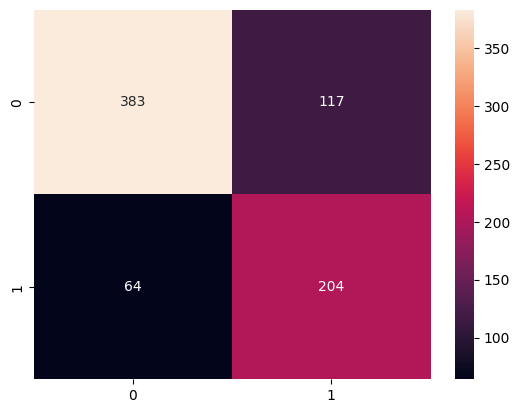

In [36]:
logistic = LogisticRegression(max_iter=1000, C=0.5, class_weight='balanced', solver='liblinear')
logistic.fit(X, y)

y_pred = logistic.predict(X)

print("веса признаков")
for name, coef in zip(X.columns, logistic.coef_[0]):
    print(f"  {name}: {coef:.4f}")

print(f"Кол-во итераций до сходимости: {logistic.n_iter_[0]}")

print(f"Accuracy:  {metrics.accuracy_score(y, y_pred):.4f}")
print(f"Precision: {metrics.precision_score(y, y_pred):.4f}")
print(f"Recall:    {metrics.recall_score(y, y_pred):.4f}")
print(f"F1-score:  {metrics.f1_score(y, y_pred):.4f}")

print("Первые 5 вероятностей")
proba = logistic.predict_proba(X)
for i in range(5):
    print(f"  Пример {i}: P(0)={proba[i][0]:.3f}, P(1)={proba[i][1]:.3f} -> предсказано: {y_pred[i]}, факт: {y.iloc[i]}")

sns.heatmap(metrics.confusion_matrix(y, y_pred), annot=True, fmt='d')

In [37]:
poly = PolynomialFeatures(2)
poly_X = poly.fit_transform(X)

polynomial = LogisticRegression(max_iter=1000, C=0.5, class_weight='balanced', solver='liblinear')
polynomial.fit(poly_X, y)
y_pred_poly = polynomial.predict(poly_X)

print(f"Accuracy:  {metrics.accuracy_score(y, y_pred_poly):.4f}")
print(f"F1-score:  {metrics.f1_score(y, y_pred_poly):.4f}")
print(f"Кол-во итераций: {polynomial.n_iter_[0]}")

Accuracy:  0.7878
F1-score:  0.7063
Кол-во итераций: 102


аргументы LogisticRegression из sklearn:

penalty (`'l2'`, `'l1'`, `'elasticnet'`, `None`) штрафует большие веса. Без регуляризации модель может переобучиться.

C (по умолчанию `1.0`) Маленький C, сильная регуляризация, проще модель. Большой C, слабая регуляризация, модель больше подстраивается под данные.

solver (`'lbfgs'`, `'liblinear'`, `'saga'`...) - алгоритм оптимизации. `liblinear` хорош для малых датасетов, `saga` поддерживает L1 и elasticnet, `lbfgs` — дефолт, хорош в большинстве случаев.

max_iter (по умолчанию `100`)  максимум итераций.

class_weight(`None` или `'balanced'`) — веса классов. `'balanced'` полезен при дисбалансе классов — автоматически увеличивает вес редкого класса.

multi_class (`'auto'`, `'ovr'`, `'multinomial'`) — стратегия для многоклассовой классификации.